### This notebook showes how to fetch, store and plot SuperDARN data in Range-Time-Intensity and Fan plots

In [1]:
# Import the modules we need.
%pylab inline
import datetime as dt
import sys

sys.path.extend(["py/txUtils/", "py/tid/"])
from fetchUtils import FetchData
from rtiUtils import RTI
from fanUtils import Fan
import tidUtils

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib

IMPORTANT: Please make sure to cite pyDARN in publications that use plots created by pyDARN using DOI: https://zenodo.org/record/3727269. Citing information for SuperDARN data is found at https://pydarn.readthedocs.io/en/master/user/citing/


In [2]:
# Load a specific event observed in multiple radars
rads = ["fhe", "bks", "fhw"]
dates = [dt.datetime(2016, 7, 8), dt.datetime(2016, 7, 8, 6)]
fds = FetchData.fetch(rads, dates)

/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


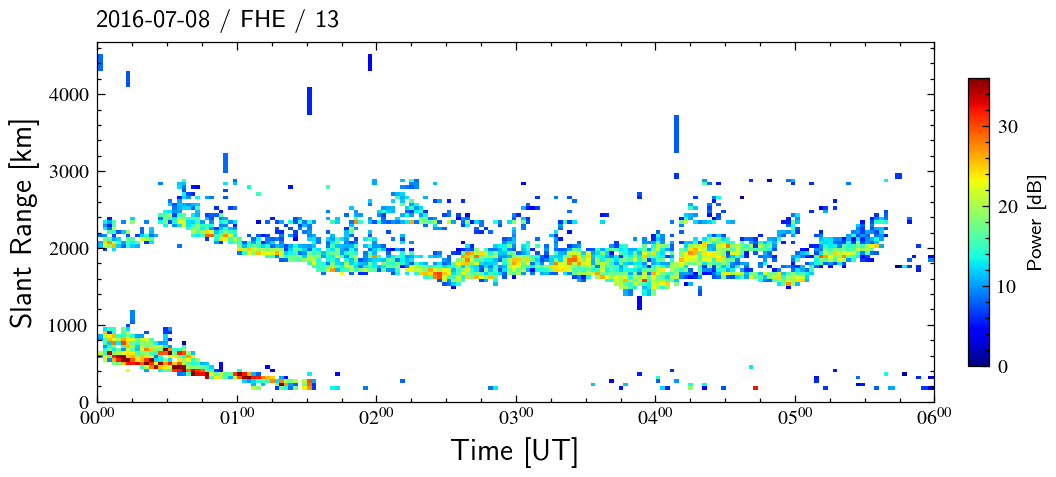

In [3]:
# Plot RTIs
rti = RTI(nGates=100, drange=dates, num_subplots=3)
rti.addParamPlot(fds["fhe"].frame, 13, "FHE / 13", cbar=True)

/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 801: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/shapely/set_operations.py: 133: RuntimeWarning: invalid value encountered in intersection


manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


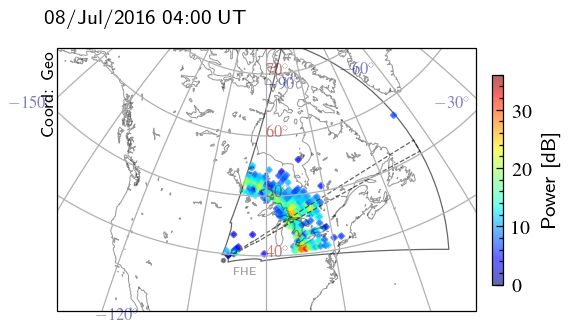

In [4]:
# Create Fan plot of FHE radar and overlay data
fan = Fan(["fhe"], dt.datetime(2016, 7, 8, 4))
fan.generate_fov(fds, beams=[13])

In [7]:
# Create annimated Fan plot of FHE radar and overlay data
dates = [dt.datetime(2016, 7, 8, 1) + dt.timedelta(minutes=i*10) for i in range(30)]
for d in dates:
    fan = Fan(["fhe"], d)
    fan.generate_fov(fds, beams=[13])
    fan.save(tidUtils.get_folder(d) + f"/{d.strftime('%H-%M')}.png")
    fan.close()

/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 801: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/shapely/set_operations.py: 133: RuntimeWarning: invalid value encountered in intersection


manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py: 406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
/home/shibaji/anaconda3/envs/agw/lib/python3.10/site-packages/cartopy/mpl/geoaxe

manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
manually setting facecolor keyword to none as aacgm fails for fill! want to know why?? think about equator!
some lats were out of extent ignored them


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/py/tid/tidUtils.py: 37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
